In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss, f1_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier


In [0]:
#data = pd.read_csv("baseline_data.csv")

In [0]:
#for column in data.columns:
#    if data[column].dtype == type(object):
#        le = preprocessing.LabelEncoder()
#        data[column] = le.fit_transform(data[column].astype(str))
#data.head()

In [0]:
#X = data.drop('DX.bl', axis=1)  
#y = data['DX.bl']  

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) 

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer, LabelEncoder, StandardScaler, scale
from sklearn.utils import resample

df = pd.read_csv('./baseline_data.csv',header=0, low_memory=False)
Catdata = df.loc[0:,'PTETHCAT':'APOE4'].join(df['PTGENDER']).join(df['imputed_genotype'])
Numdata = df.loc[0:,:'Thickness..thickinthehead..2035'].join(df['AGE']).join(df['PTEDUCAT']).join(df['MMSE'])
labels = df['DX.bl']

for i in Catdata.columns:
    the_value = str(Catdata[i].mode().values[0])
    Catdata[i].replace('NaN',the_value,inplace = True)
    dummy_data = pd.get_dummies(Catdata[i], prefix=i+"_", drop_first=True)
    Catdata = pd.concat([Catdata, dummy_data], axis=1)
    Catdata.drop(i, axis=1, inplace=True)

le = LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
labels = labels.astype('float')



data = Numdata.join(Catdata)
data['labels'] = labels

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = ([],[],[],[])
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,:'imputed_genotype__True'], data['labels'], test_size = 0.2, random_state = 2018)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = scaler.transform(X_test)
X_train['labels'] = np.array(y_train)

from sklearn.utils import resample
Xs_train = []
Labels = []
for _ in range(5):
    d = resample(X_train,n_samples=502)
    Xs_train.append(d.iloc[:,:-1])
    Labels.append(d['labels'])
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data))

FileNotFoundError: ignored

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1)

NameError: ignored

In [4]:
pca = PCA().fit(data)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
#plt.title('Diabetes Dataset Explained Variance')
plt.show()

NameError: ignored

In [0]:
pca = PCA(n_components=390)
dataset=pca.fit_transform(data)
principalDf = pd.DataFrame(data = dataset)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(principalDf,labels,test_size=0.20,random_state=100)

In [0]:
y_train.shape

(502,)

In [0]:
classifiers = [
    KNeighborsClassifier(3),
    LinearSVC(C = 100,penalty='l2', loss='squared_hinge', dual=False),    ### Using SVM Hyper-Parameter Tuning
    LogisticRegression(random_state=0, C = 2.5),
    RandomForestClassifier(min_samples_split = 12, n_estimators = 250, max_features = None , min_samples_leaf= 5, max_depth= 10, bootstrap = True),
    GaussianProcessClassifier(optimizer='Welch',multi_class='one_vs_rest',n_restarts_optimizer=5),
    DecisionTreeClassifier()
]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss", "F-1 Score"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    train_predictions = clf.predict(X_test)
    f1 = f1_score(y_test, train_predictions, average='macro')
    print("F-1 Score: {}".format(f1)) 
    
    log_entry = pd.DataFrame([[name, acc*100, ll, f1]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 41.2698%
Log Loss: 7.9607551606420595
F-1 Score: 0.39712248535777944
SVC
****Results****
Accuracy: 69.0476%
Log Loss: 0.7089578399718031
F-1 Score: 0.6874370301480276
LogisticRegression
****Results****
Accuracy: 72.2222%
Log Loss: 0.9149965739669483
F-1 Score: 0.7408389638543268
RandomForestClassifier
****Results****
Accuracy: 45.2381%
Log Loss: 1.3042586094253392
F-1 Score: 0.3881075769822025
GaussianProcessClassifier
****Results****
Accuracy: 47.6190%
Log Loss: 1.0986122886681093
F-1 Score: 0.21505376344086022


In [0]:
log

,Classifier,Accuracy,Log Loss,F-1 Score
0,KNeighborsClassifier,41.269841,7.960755,0.397122
0,SVC,69.047619,0.708958,0.687437
0,LogisticRegression,72.222222,0.914997,0.740839
0,RandomForestClassifier,45.238095,1.304259,0.388108
0,GaussianProcessClassifier,47.619048,1.098612,0.215054


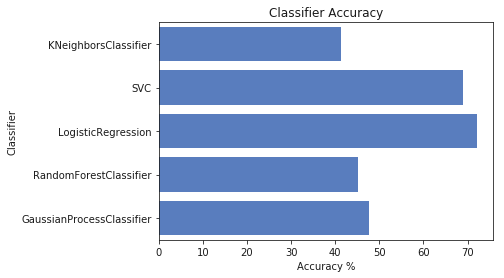

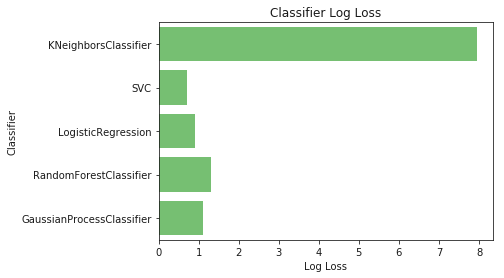

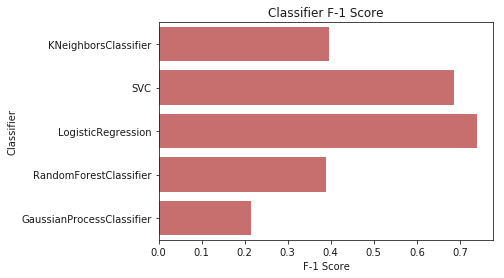

In [0]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()


sns.set_color_codes("muted")
sns.barplot(x='F-1 Score', y='Classifier', data=log, color="r")

plt.xlabel('F-1 Score')
plt.title('Classifier F-1 Score')
plt.show()

In [0]:
# Voting Ensemble for Classification
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score 
seed = 7
num_trees = 70
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression(random_state=0, C = 2.5)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
#model3 = LinearSVC(C = 100,penalty='l2', loss='squared_hinge', dual=False)
#estimators.append(('svm', model3))
model4 = GaussianProcessClassifier(optimizer='Welch',multi_class='one_vs_rest',n_restarts_optimizer=5)
estimators.append(('GPC', model4))
model5 = RandomForestClassifier(min_samples_split = 12, n_estimators = 250, max_features = None , min_samples_leaf= 5, max_depth= 10, bootstrap = True)
estimators.append(('RF', model5))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,y_train)
#print("",ensemble.score(X_test,y_test))
#predictions_train = ensemble.predict(X_train)
predictions_test = ensemble.predict(X_test)
f1_Score=f1_score(y_test, predictions_test, average='macro')
accuracy=accuracy_score(y_test, predictions_test)
print("F1 Score {}".format(f1_Score))
print("Accuracy {}".format(accuracy))

results = model_selection.cross_val_score(ensemble, data, labels, cv=kfold, scoring='accuracy')
#results = model_selection.cross_val_score(ensemble, principalDf,labels, cv=kfold, scoring='accuracy')
#print(results.mean())
print("Accuracy: ", results.mean())

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


F1 Score 1.0
Accuracy 1.0


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Accuracy:  1.0


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
